In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
mortalidad_2022 = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/conjunto_de_datos_defunciones_registradas_2022.CSV', 
                      encoding = 'latin1')

mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999
1,1,1,15,1,1,1,15,1,1,1,15,1,J439,NaN,33D,2,888,8,8,9,8888,1,998,4090,88,8888,15,2,2016,31,1,2022,29,6,1925,2,110,1,9,4,8,88,88,1,8,8,2,8,8,8,12,3,2,9,9,19,50,10,5,76.0,33,1,23,9,99,1,2022,NaN,88,888,8888,0,1001000242,999
2,1,1,15,1,1,1,15,1,1,1,15,1,E112,NaN,20D,1,888,8,8,2,8888,1,998,4085,88,8888,27,11,2016,2,2,2022,15,1,1931,1,72,1,3,4,8,88,88,1,8,8,9,8,8,8,3,3,2,8,8,12,0,4,2,52.0,20,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001025,999
3,1,1,15,1,1,1,15,1,1,1,15,1,I269,NaN,29A,1,888,8,8,2,8888,1,998,4087,88,8888,22,10,2014,2,2,2022,9,10,1927,1,73,3,3,4,8,88,88,1,8,8,2,8,8,8,4,1,99,8,8,8,20,9,5,68.0,29,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001026,999
4,1,1,15,1,1,1,15,1,1,1,15,1,W104,S061,50,1,888,8,8,2,8888,1,998,4065,88,8888,8,11,2012,14,2,2022,8,7,1947,1,83,6,5,1,2,4,88,1,8,8,2,8,8,8,9,1,7,8,8,23,50,20,13,97.0,E50,1,18,8,99,2,2022,NaN,1,1,1,0,1001001027,999


In [3]:
entidad = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_estado.csv', 
                      encoding = 'latin1')

entidad.head()

,ent_regis,dc_estado
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila


In [4]:
mortalidad_2022=pd.merge(mortalidad_2022,entidad )

In [5]:
mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax,dc_estado
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999,Aguascalientes
1,1,1,15,1,1,1,15,1,1,1,15,1,J439,NaN,33D,2,888,8,8,9,8888,1,998,4090,88,8888,15,2,2016,31,1,2022,29,6,1925,2,110,1,9,4,8,88,88,1,8,8,2,8,8,8,12,3,2,9,9,19,50,10,5,76.0,33,1,23,9,99,1,2022,NaN,88,888,8888,0,1001000242,999,Aguascalientes
2,1,1,15,1,1,1,15,1,1,1,15,1,E112,NaN,20D,1,888,8,8,2,8888,1,998,4085,88,8888,27,11,2016,2,2,2022,15,1,1931,1,72,1,3,4,8,88,88,1,8,8,9,8,8,8,3,3,2,8,8,12,0,4,2,52.0,20,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001025,999,Aguascalientes
3,1,1,15,1,1,1,15,1,1,1,15,1,I269,NaN,29A,1,888,8,8,2,8888,1,998,4087,88,8888,22,10,2014,2,2,2022,9,10,1927,1,73,3,3,4,8,88,88,1,8,8,2,8,8,8,4,1,99,8,8,8,20,9,5,68.0,29,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001026,999,Aguascalientes
4,1,1,15,1,1,1,15,1,1,1,15,1,W104,S061,50,1,888,8,8,2,8888,1,998,4065,88,8888,8,11,2012,14,2,2022,8,7,1947,1,83,6,5,1,2,4,88,1,8,8,2,8,8,8,9,1,7,8,8,23,50,20,13,97.0,E50,1,18,8,99,2,2022,NaN,1,1,1,0,1001001027,999,Aguascalientes


In [6]:
causa_muerte = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_causas_muerte_2.csv', 
                      encoding = 'latin1')

causa_muerte.head()

,lista_mex,DESCRIP,Causa
0,1,Enfermedades infecciosas intestinales,Enfermedades infecciosas intestinales
1,01A,C??lera,Enfermedades infecciosas intestinales
2,01B,Fiebre tifoidea,Enfermedades infecciosas intestinales
3,01C,Fiebre paratifoidea,Enfermedades infecciosas intestinales
4,01D,Shigelosis,Enfermedades infecciosas intestinales


In [7]:
mortalidad_2022=pd.merge(mortalidad_2022, causa_muerte )


In [8]:
mortalidad_2022['dc_estado'].value_counts()

dc_estado
EDOMEX                 88425
CDMX                   77071
Veracruz               59130
Jalisco                54498
Puebla                 43194
Guanajuato             41543
Nuevo Leon             37155
Michoacan              31430
Chiapas                31036
Oaxaca                 28510
Chihuahua              27656
Baja California        25616
Tamaulipas             21574
Sonora                 21137
Coahuila               20103
San Luis Potosi        19486
Guerrero               19432
Hidalgo                17327
Sinaloa                16861
Morelos                15210
Tabasco                14914
Yucatan                14853
Queretaro              12957
Zacatecas              11690
Durango                10846
Quintana Roo            8459
Aguascalientes          7648
Tlaxcala                7569
Nayarit                 7506
Colima                  5788
Campeche                5260
Baja California Sur     3947
Name: count, dtype: int64

In [9]:
mortalidad_2022['Causa'].value_counts()

Causa
Enfermedades cardiacas                   199414
Diabetes mellitus                        115025
Tumores                                   96175
Enfermedades digestivas                   74631
Infecciones respiratorias                 65874
Otras enfermedades                        55388
Homicidio                                 39240
Enfermedades cerebrovasculares            35977
Otros accidentes                          21036
Accidentes de transporte                  16414
Enfermedades del sistema nervioso         13763
Causas obstetricas                        11083
Enfermedad metabolica                     11054
Enfermedad bacteriana                      9894
Suicidios                                  8253
Malformaciones congenitas                  7958
Desnutricion                               6684
Virus                                      6028
Trastornos mentales                        5130
Enfermedades circulatorias                 4240
Enfermedades infecciosas intestina

In [10]:
mortalidad_geo=mortalidad_2022.pivot_table(index = "Causa", columns = "dc_estado", values = "id_inegi", aggfunc = "count")

In [11]:
mortalidad_geo

dc_estado,Aguascalientes,Baja California,Baja California Sur,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,EDOMEX,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacan,Morelos,Nayarit,Nuevo Leon,Oaxaca,Puebla,Queretaro,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
Causa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accidentes de transporte,266,190,131,626,170,671,896,436,187,378,758,823,450,473,1292,884,345,320,696,561,719,425,212,594,623,557,577,592,252,521,362,427
Causas obstetricas,127,271,60,889,78,671,431,357,53,231,1282,481,341,256,696,442,134,104,455,330,643,202,131,235,235,211,266,357,111,753,158,92
Desnutricion,117,94,32,132,44,280,132,174,23,45,647,385,195,159,420,276,172,95,210,654,495,99,63,231,99,111,113,130,71,762,64,160
Diabetes mellitus,916,2571,387,10237,744,4639,2890,3040,675,1199,17021,6422,3340,2467,5906,4643,2204,846,4030,4477,7663,1433,1081,2658,1687,1642,2812,3107,1313,10320,1393,1262
Enfermedad bacteriana,81,651,66,1009,65,359,426,240,86,134,802,315,204,189,778,243,133,137,554,212,355,182,132,245,313,490,151,341,55,661,202,83
Enfermedad metabolica,183,303,48,1273,53,311,443,302,46,146,1274,454,301,255,889,452,242,98,394,417,474,207,99,259,212,241,176,260,115,744,140,243
Enfermedades cardiacas,1521,5311,957,18404,1279,7561,6618,5265,1016,3379,20613,10681,4485,4654,12373,7532,3817,1597,10003,6821,11677,2850,1492,5284,4482,5357,3942,5819,1998,15957,4084,2585
Enfermedades cerebrovasculares,345,1150,192,3518,220,1175,1069,886,233,401,3615,1497,869,938,2399,1339,574,300,1978,1667,1967,630,365,826,735,832,623,931,321,3070,859,453
Enfermedades circulatorias,54,108,24,611,13,108,208,98,23,45,433,179,70,85,417,187,52,31,166,134,164,137,31,90,86,117,52,85,34,263,61,74


In [12]:
mortalidad_geo['Aguascalientes']=(mortalidad_geo['Aguascalientes']/1425607)

In [13]:
mortalidad_geo['EDOMEX']=(mortalidad_geo['EDOMEX']/16992418)

In [14]:
mortalidad_geo['CDMX']=(mortalidad_geo['CDMX']/9209944)

In [15]:
mortalidad_geo['Veracruz']=(mortalidad_geo['Veracruz']/8062579)

In [16]:
mortalidad_geo['Jalisco']=(mortalidad_geo['Jalisco']/8348151)

In [17]:
mortalidad_geo['Puebla']=(mortalidad_geo['Puebla']/6583278)

In [18]:
mortalidad_geo['Guanajuato']=(mortalidad_geo['Guanajuato']/6166934)

In [19]:
mortalidad_geo['Nuevo Leon']=(mortalidad_geo['Nuevo Leon']/5784442)

In [20]:
mortalidad_geo['Michoacan']=(mortalidad_geo['Michoacan']/4748846)

In [21]:
mortalidad_geo['Chiapas']=(mortalidad_geo['Chiapas']/5543828)

In [22]:
mortalidad_geo['Oaxaca']=(mortalidad_geo['Oaxaca']/4132148)

In [23]:
mortalidad_geo['Chihuahua']=(mortalidad_geo['Chihuahua']/3741869)

In [24]:
mortalidad_geo['Baja California']=(mortalidad_geo['Baja California']/3769020)

In [25]:
mortalidad_geo['Sonora']=(mortalidad_geo['Sonora']/2944840)

In [26]:
mortalidad_geo['Coahuila']=(mortalidad_geo['Coahuila']/3146771)

In [27]:
mortalidad_geo['San Luis Potosi']=(mortalidad_geo['San Luis Potosi']/2822255)

In [28]:
mortalidad_geo['Guerrero']=(mortalidad_geo['Guerrero']/3540685)

In [29]:
mortalidad_geo['Hidalgo']=(mortalidad_geo['Hidalgo']/3082841)

In [30]:
mortalidad_geo['Sinaloa']=(mortalidad_geo['Sinaloa']/3026943)

In [31]:
mortalidad_geo['Morelos']=(mortalidad_geo['Morelos']/1971520)

In [32]:
mortalidad_geo['Tabasco']=(mortalidad_geo['Tabasco']/2402598)

In [33]:
mortalidad_geo['Yucatan']=(mortalidad_geo['Yucatan']/2320898)

In [34]:
mortalidad_geo['Queretaro']=(mortalidad_geo['Queretaro']/2368467)

In [35]:
mortalidad_geo['Zacatecas']=(mortalidad_geo['Zacatecas']/1622138)

In [36]:
mortalidad_geo['Durango']=(mortalidad_geo['Durango']/1832650)

In [37]:
mortalidad_geo['Quintana Roo']=(mortalidad_geo['Quintana Roo']/1857985)

In [38]:
mortalidad_geo['Tlaxcala']=(mortalidad_geo['Tlaxcala']/1342977)

In [39]:
mortalidad_geo['Nayarit']=(mortalidad_geo['Nayarit']/1235456 )

In [40]:
mortalidad_geo['Colima']=(mortalidad_geo['Colima']/731391)

In [41]:
mortalidad_geo['Campeche']=(mortalidad_geo['Campeche']/928363)

In [42]:
mortalidad_geo['Baja California Sur']=(mortalidad_geo['Baja California Sur']/798447)

In [43]:
mortalidad_geo['Tamaulipas']=(mortalidad_geo['Tamaulipas']/3527735)

In [44]:
mortalidad_geo

dc_estado,Aguascalientes,Baja California,Baja California Sur,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,EDOMEX,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacan,Morelos,Nayarit,Nuevo Leon,Oaxaca,Puebla,Queretaro,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
Causa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accidentes de transporte,0.000187,0.000050,0.000164,0.000068,0.000183,0.000121,0.000239,0.000139,0.000256,0.000206,0.000045,0.000133,0.000127,0.000153,0.000155,0.000186,0.000175,0.000259,0.000120,0.000136,0.000109,0.000179,0.000114,0.000210,0.000206,0.000189,0.000240,0.000168,0.000188,0.000065,0.000156,0.000263
Causas obstetricas,0.000089,0.000072,0.000075,0.000097,0.000084,0.000121,0.000115,0.000113,0.000072,0.000126,0.000075,0.000078,0.000096,0.000083,0.000083,0.000093,0.000068,0.000084,0.000079,0.000080,0.000098,0.000085,0.000071,0.000083,0.000078,0.000072,0.000111,0.000101,0.000083,0.000093,0.000068,0.000057
Desnutricion,0.000082,0.000025,0.000040,0.000014,0.000047,0.000051,0.000035,0.000055,0.000031,0.000025,0.000038,0.000062,0.000055,0.000052,0.000050,0.000058,0.000087,0.000077,0.000036,0.000158,0.000075,0.000042,0.000034,0.000082,0.000033,0.000038,0.000047,0.000037,0.000053,0.000095,0.000028,0.000099
Diabetes mellitus,0.000643,0.000682,0.000485,0.001112,0.000801,0.000837,0.000772,0.000966,0.000923,0.000654,0.001002,0.001041,0.000943,0.000800,0.000707,0.000978,0.001118,0.000685,0.000697,0.001083,0.001164,0.000605,0.000582,0.000942,0.000557,0.000558,0.001170,0.000881,0.000978,0.001280,0.000600,0.000778
Enfermedad bacteriana,0.000057,0.000173,0.000083,0.000110,0.000070,0.000065,0.000114,0.000076,0.000118,0.000073,0.000047,0.000051,0.000058,0.000061,0.000093,0.000051,0.000067,0.000111,0.000096,0.000051,0.000054,0.000077,0.000071,0.000087,0.000103,0.000166,0.000063,0.000097,0.000041,0.000082,0.000087,0.000051
Enfermedad metabolica,0.000128,0.000080,0.000060,0.000138,0.000057,0.000056,0.000118,0.000096,0.000063,0.000080,0.000075,0.000074,0.000085,0.000083,0.000106,0.000095,0.000123,0.000079,0.000068,0.000101,0.000072,0.000087,0.000053,0.000092,0.000070,0.000082,0.000073,0.000074,0.000086,0.000092,0.000060,0.000150
Enfermedades cardiacas,0.001067,0.001409,0.001199,0.001998,0.001378,0.001364,0.001769,0.001673,0.001389,0.001844,0.001213,0.001732,0.001267,0.001510,0.001482,0.001586,0.001936,0.001293,0.001729,0.001651,0.001774,0.001203,0.000803,0.001872,0.001481,0.001819,0.001641,0.001650,0.001488,0.001979,0.001760,0.001594
Enfermedades cerebrovasculares,0.000242,0.000305,0.000240,0.000382,0.000237,0.000212,0.000286,0.000282,0.000319,0.000219,0.000213,0.000243,0.000245,0.000304,0.000287,0.000282,0.000291,0.000243,0.000342,0.000403,0.000299,0.000266,0.000196,0.000293,0.000243,0.000283,0.000259,0.000264,0.000239,0.000381,0.000370,0.000279
Enfermedades circulatorias,0.000038,0.000029,0.000030,0.000066,0.000014,0.000019,0.000056,0.000031,0.000031,0.000025,0.000025,0.000029,0.000020,0.000028,0.000050,0.000039,0.000026,0.000025,0.000029,0.000032,0.000025,0.000058,0.000017,0.000032,0.000028,0.000040,0.000022,0.000024,0.000025,0.000033,0.000026,0.000046


In [45]:
mortalidad_geo=mortalidad_geo.transpose()

In [46]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Suicidios,Trastornos mentales,Tumores,Virus
dc_estado,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.000187,0.000089,0.000082,0.000643,0.000057,0.000128,0.001067,0.000242,0.000038,0.000137,0.000520,0.000025,0.000086,0.000542,0.000011,0.000055,0.000392,0.000144,0.000112,0.000084,0.000698,0.000027
Baja California,0.000050,0.000072,0.000025,0.000682,0.000173,0.000080,0.001409,0.000305,0.000029,0.000109,0.000501,0.000016,0.000829,0.000545,0.000028,0.000055,0.000415,0.000486,0.000029,0.000080,0.000777,0.000100
Baja California Sur,0.000164,0.000075,0.000040,0.000485,0.000083,0.000060,0.001199,0.000240,0.000030,0.000100,0.000420,0.000018,0.000116,0.000461,0.000010,0.000044,0.000298,0.000157,0.000091,0.000026,0.000766,0.000060
CDMX,0.000068,0.000097,0.000014,0.001112,0.000110,0.000138,0.001998,0.000382,0.000066,0.000150,0.000905,0.000035,0.000249,0.000746,0.000024,0.000096,0.000617,0.000101,0.000028,0.000043,0.001317,0.000071
Campeche,0.000183,0.000084,0.000047,0.000801,0.000070,0.000057,0.001378,0.000237,0.000014,0.000096,0.000509,0.000014,0.000136,0.000354,0.000003,0.000067,0.000514,0.000148,0.000098,0.000027,0.000730,0.000098
Chiapas,0.000121,0.000121,0.000051,0.000837,0.000065,0.000056,0.001364,0.000212,0.000019,0.000093,0.000578,0.000063,0.000096,0.000393,0.000008,0.000074,0.000617,0.000079,0.000048,0.000027,0.000623,0.000054
Chihuahua,0.000239,0.000115,0.000035,0.000772,0.000114,0.000118,0.001769,0.000286,0.000056,0.000140,0.000617,0.000024,0.000590,0.000616,0.000025,0.000056,0.000432,0.000246,0.000143,0.000073,0.000869,0.000057
Coahuila,0.000139,0.000113,0.000055,0.000966,0.000076,0.000096,0.001673,0.000282,0.000031,0.000125,0.000530,0.000010,0.000066,0.000543,0.000018,0.000062,0.000447,0.000197,0.000099,0.000030,0.000796,0.000032
Colima,0.000256,0.000072,0.000031,0.000923,0.000118,0.000063,0.001389,0.000319,0.000031,0.000149,0.000697,0.000014,0.001237,0.000618,0.000007,0.000044,0.000677,0.000211,0.000088,0.000042,0.000870,0.000059


In [47]:
mortalidad_geo=mortalidad_geo.multiply(100000)

In [48]:
mortalidad_geo = mortalidad_geo.assign(marginacion=[22.20572085,21.38029741,21.47338792,17.8050514,23.14310928,11.99865417,20.01527143,22.54568427,21.5323285,18.47273958,20.80363507,19.41945668,10.98915574,18.05317766,21.81514776,18.2808308,19.81393792,17.51595893,23.44431832,13.21640946,17.72159967,20.83818967,
   20.62886194,18.68800885,20.50985207,21.40564025,18.33245091,20.99658236,19.87073567,16.4141575,17.5122127,19.49723183])

In [49]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Suicidios,Trastornos mentales,Tumores,Virus,marginacion
dc_estado,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,18.658719,8.908486,8.207030,64.253332,5.681790,12.836637,106.691395,24.200218,3.787860,13.748530,51.977859,2.525240,8.557758,54.152372,1.052183,5.471354,39.211368,14.449985,11.153144,8.417467,69.794831,2.735677,22.205721
Baja California,5.041098,7.190198,2.494017,68.214018,17.272394,8.039225,140.911961,30.511910,2.865466,10.904691,50.119129,1.618458,82.859735,54.549989,2.812402,5.492144,41.496198,48.606800,2.865466,8.012693,77.739041,10.029132,21.380297
Baja California Sur,16.406850,7.514588,4.007780,48.469091,8.266046,6.011670,119.857674,24.046681,3.005835,10.019450,41.956448,1.753404,11.647611,46.089471,1.001945,4.383509,29.807865,15.655391,9.142748,2.630106,76.648794,6.011670,21.473388
CDMX,6.797001,9.652610,1.433233,111.151599,10.955550,13.822017,199.827491,38.197844,6.634134,14.951231,90.532581,3.507079,24.929576,74.615003,2.432154,9.630895,61.737618,10.054350,2.844751,4.332274,131.683754,7.101020,17.805051
Campeche,18.311803,8.401886,4.739525,80.141066,7.001572,5.708974,137.769385,23.697627,1.400314,9.586767,50.949898,1.400314,13.572277,35.438724,0.323149,6.678422,51.380764,14.757159,9.802200,2.692912,73.031777,9.802200,23.143109
Chiapas,12.103550,12.103550,5.050662,83.678642,6.475670,5.609842,136.385905,21.194741,1.948112,9.343724,57.848115,6.331365,9.578219,39.250857,0.775637,7.377574,61.690226,7.882640,4.798129,2.687674,62.339596,5.375347,11.998654
Chihuahua,23.945253,11.518308,3.527649,77.234131,11.384685,11.839003,176.863487,28.568611,5.558719,13.950248,61.653682,2.405215,58.954496,61.626957,2.538838,5.585444,43.213699,24.559919,14.297668,7.269095,86.908441,5.692343,20.015271
Coahuila,13.855473,11.344963,5.529478,96.606966,7.626866,9.597139,167.314368,28.155846,3.114304,12.520771,52.974938,1.048694,6.609950,54.309640,1.811381,6.196828,44.680722,19.734515,9.914925,3.018968,79.637190,3.241418,22.545684
Colima,25.567720,7.246466,3.144693,92.289897,11.758416,6.289386,138.913386,31.857105,3.144693,14.903109,69.730144,1.367258,123.736825,61.800049,0.683629,4.375225,67.679258,21.055769,8.750449,4.238499,86.957592,5.879208,21.532328


In [65]:
mortalidad_geo = mortalidad_geo.assign(ISO=["MX-AGU","MX-BCN","MX-BCS","MX-CMX","MX-CAM","MX-CHP","MX-CHH","MX-COA","MX-COL","MX-DUR","MX-MEX",
                                            "MX-GUA","MX-GRO","MX-HID","MX-JAL","MX-MIC","MX-MOR","MX-NAY","MX-NLE","MX-OAX",
                                            "MX-PUE","MX-QUE","MX-ROO","MX-SLP","MX-SIN","MX-SON","MX-TAB","MX-TAM","MX-TLA",
                                             "MX-VER","MX-YUC","MX-ZAC"])

In [66]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Suicidios,Trastornos mentales,Tumores,Virus,marginacion,ISO
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,18.658719,8.908486,8.207030,64.253332,5.681790,12.836637,106.691395,24.200218,3.787860,13.748530,51.977859,2.525240,8.557758,54.152372,1.052183,5.471354,39.211368,14.449985,11.153144,8.417467,69.794831,2.735677,22.205721,MX-AGU
Baja California,5.041098,7.190198,2.494017,68.214018,17.272394,8.039225,140.911961,30.511910,2.865466,10.904691,50.119129,1.618458,82.859735,54.549989,2.812402,5.492144,41.496198,48.606800,2.865466,8.012693,77.739041,10.029132,21.380297,MX-BCN
Baja California Sur,16.406850,7.514588,4.007780,48.469091,8.266046,6.011670,119.857674,24.046681,3.005835,10.019450,41.956448,1.753404,11.647611,46.089471,1.001945,4.383509,29.807865,15.655391,9.142748,2.630106,76.648794,6.011670,21.473388,MX-BCS
CDMX,6.797001,9.652610,1.433233,111.151599,10.955550,13.822017,199.827491,38.197844,6.634134,14.951231,90.532581,3.507079,24.929576,74.615003,2.432154,9.630895,61.737618,10.054350,2.844751,4.332274,131.683754,7.101020,17.805051,MX-CMX
Campeche,18.311803,8.401886,4.739525,80.141066,7.001572,5.708974,137.769385,23.697627,1.400314,9.586767,50.949898,1.400314,13.572277,35.438724,0.323149,6.678422,51.380764,14.757159,9.802200,2.692912,73.031777,9.802200,23.143109,MX-CAM
Chiapas,12.103550,12.103550,5.050662,83.678642,6.475670,5.609842,136.385905,21.194741,1.948112,9.343724,57.848115,6.331365,9.578219,39.250857,0.775637,7.377574,61.690226,7.882640,4.798129,2.687674,62.339596,5.375347,11.998654,MX-CHP
Chihuahua,23.945253,11.518308,3.527649,77.234131,11.384685,11.839003,176.863487,28.568611,5.558719,13.950248,61.653682,2.405215,58.954496,61.626957,2.538838,5.585444,43.213699,24.559919,14.297668,7.269095,86.908441,5.692343,20.015271,MX-CHH
Coahuila,13.855473,11.344963,5.529478,96.606966,7.626866,9.597139,167.314368,28.155846,3.114304,12.520771,52.974938,1.048694,6.609950,54.309640,1.811381,6.196828,44.680722,19.734515,9.914925,3.018968,79.637190,3.241418,22.545684,MX-COA
Colima,25.567720,7.246466,3.144693,92.289897,11.758416,6.289386,138.913386,31.857105,3.144693,14.903109,69.730144,1.367258,123.736825,61.800049,0.683629,4.375225,67.679258,21.055769,8.750449,4.238499,86.957592,5.879208,21.532328,MX-COL


In [50]:
mortalidad_geo.to_csv('Mortalidad_geo.csv')

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
#direccion = "C:\Users\balvi\Desktop\Data Science\6 Temas selectos\mexican-states (1).shp"'

In [62]:
shapefile = gpd.read_file('C:/Users/balvi/Desktop/Data Science/4 Visualizaciones/mexican-states.shp')

In [64]:
shapefile

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


In [68]:
shapefile = shapefile.merge(
                     right = mortalidad_geo,
                     left_on = 'ISO3166-2',
                     right_on = 'ISO',
                     how = 'left')

Text(0.5, 1.0, 'Fallecimientos por homicidios por cada cien mil habitantes')

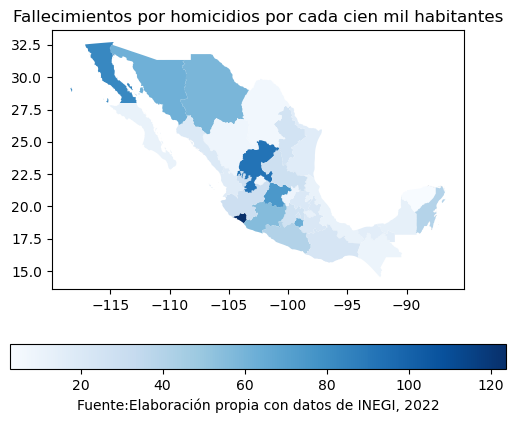

In [99]:
shapefile.plot(column = 'Homicidio',
               legend = True, 
            legend_kwds = {
              'label': "Fuente:Elaboración propia con datos de INEGI, 2022",
              'orientation': "horizontal"
              }, cmap = 'Blues')
plt.title('Fallecimientos por homicidios por cada cien mil habitantes')

Text(0.5, 1.0, 'Fallecimientos por diabetes mellitus por cada cien mil habitantes')

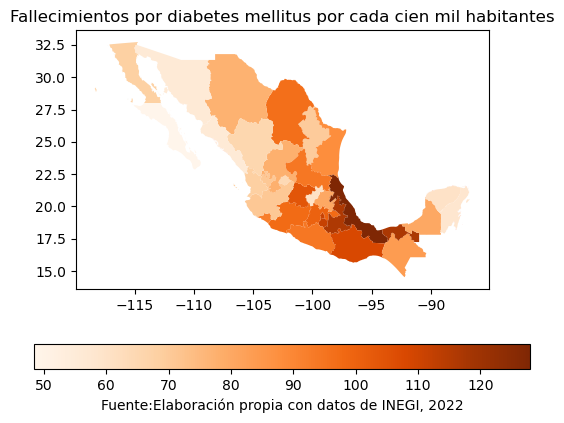

In [98]:
shapefile.plot(column = 'Diabetes mellitus',
               legend = True, 
            legend_kwds = {
              'label': "Fuente:Elaboración propia con datos de INEGI, 2022",
              'orientation': "horizontal"
              }, cmap = 'Oranges')
plt.title('Fallecimientos por diabetes mellitus por cada cien mil habitantes')

Text(0.5, 1.0, 'Fallecimientos por enfermedades cardiacas por cada cien mil habitantes')

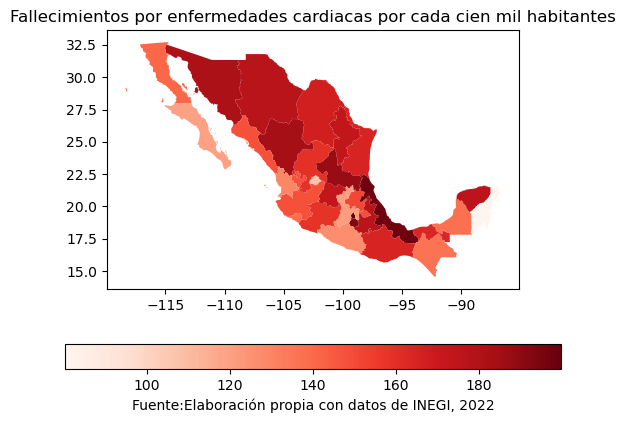

In [97]:
shapefile.plot(column = 'Enfermedades cardiacas',
               legend = True, 
            legend_kwds = {
              'label': "Fuente:Elaboración propia con datos de INEGI, 2022",
              'orientation': "horizontal"
              }, cmap = 'Reds')
plt.title('Fallecimientos por enfermedades cardiacas por cada cien mil habitantes')

Text(0.5, 1.0, 'Fallecimientos por accidentes de transporte por cada cien mil habitantes')

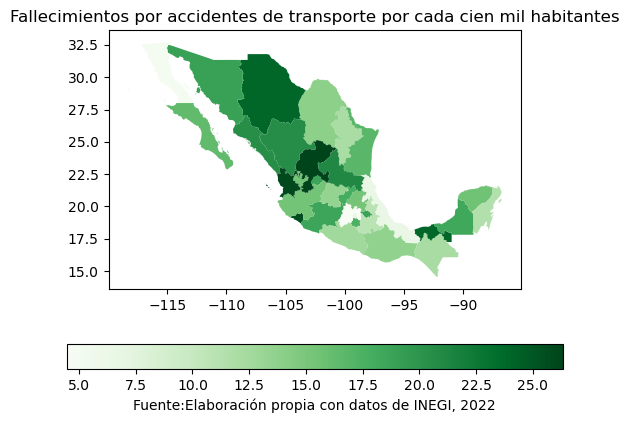

In [100]:
shapefile.plot(column = 'Accidentes de transporte',
               legend = True, 
            legend_kwds = {
              'label': "Fuente:Elaboración propia con datos de INEGI, 2022",
              'orientation': "horizontal"
              }, cmap = 'Greens')
plt.title('Fallecimientos por accidentes de transporte por cada cien mil habitantes')

Text(0.5, 1.0, 'Fallecimientos por sucidios por cada cien mil habitantes')

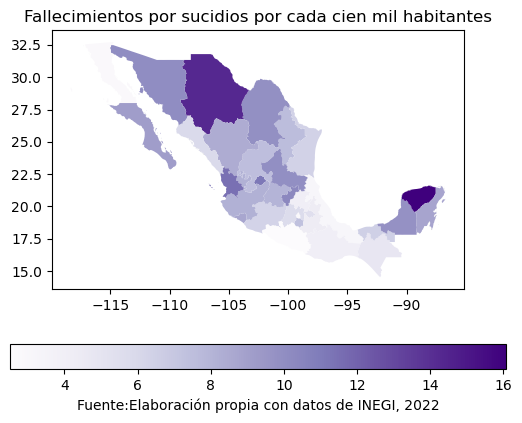

In [102]:
shapefile.plot(column = 'Suicidios',
               legend = True, 
            legend_kwds = {
              'label': "Fuente:Elaboración propia con datos de INEGI, 2022",
              'orientation': "horizontal"
              }, cmap = 'Purples')
plt.title('Fallecimientos por sucidios por cada cien mil habitantes')